# **Fish Analysis** 🐟🐠
`context`: Dataset recording various measurements of 7 different species of fish at a fish market. Predictive models can be used to predict weight, species, etc.

| **Attribute** | **Description** |  
|-------------|----------------|  
| **Species** | Species name of the fish |  
| **Weight**   | Weight of the fish in grams |  
| **Length1** (Standard Length) | Vertical length in cm |  
| **Length2** (Forked Length) | Diagonal length in cm |  
| **Length3** (Total Length) | Cross length in cm |  
| **Height**   | Height in cm from dorsal to the bottom thin |  
| **Width**    | Width in cm, thickness of the body |  




In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('dataset\Fish.csv')

In [4]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [5]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [7]:
numerical_data = df.select_dtypes(include='float64')

In [8]:
plt.rcParams['figure.figsize'] = (20, 15)

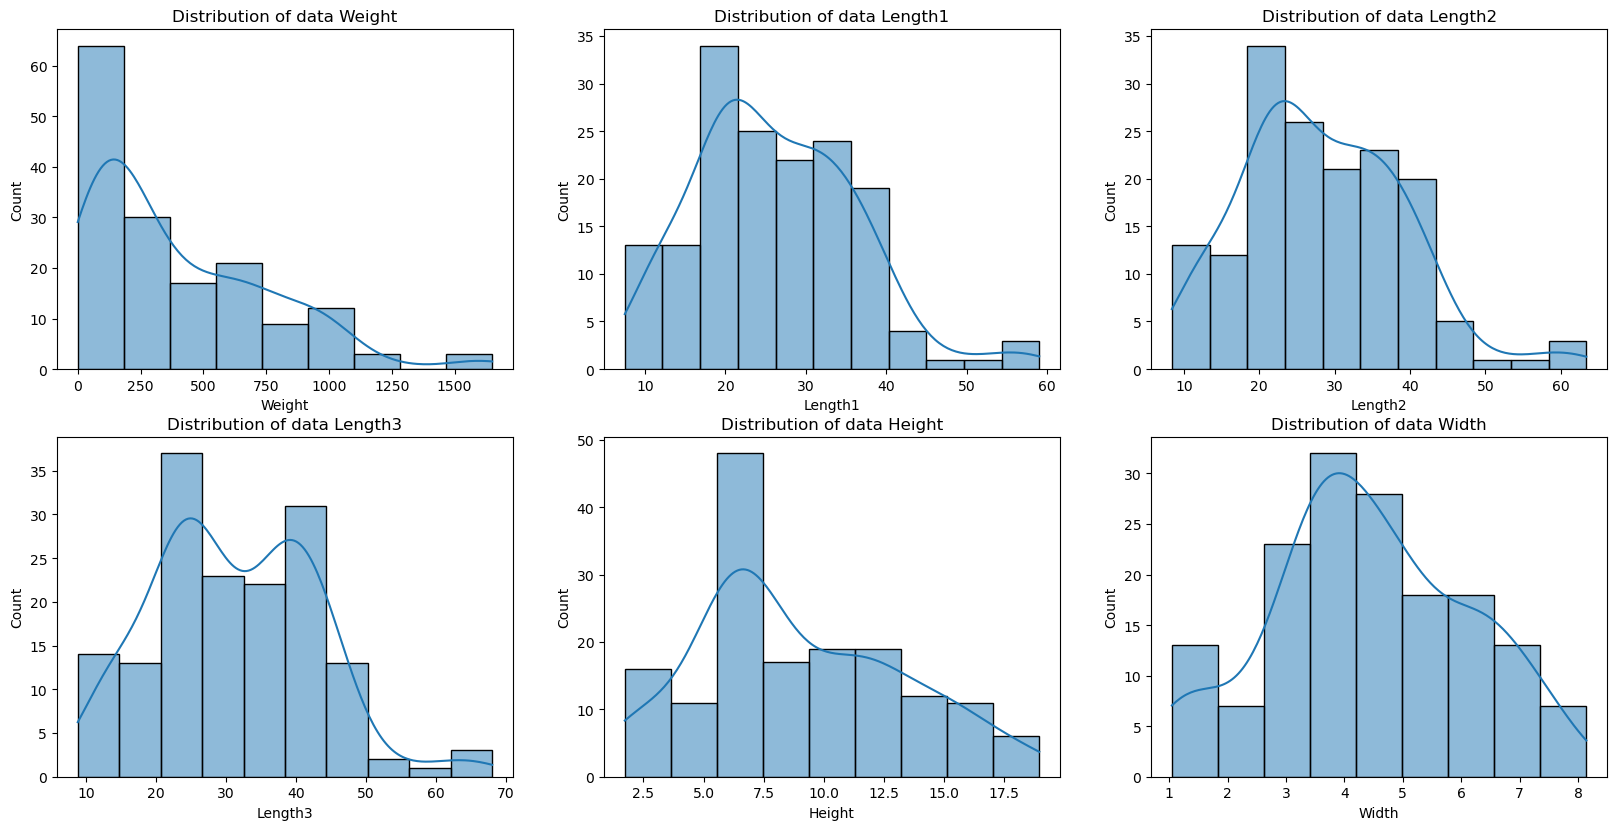

In [9]:
for i, col in enumerate(numerical_data):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of data {col}")
    

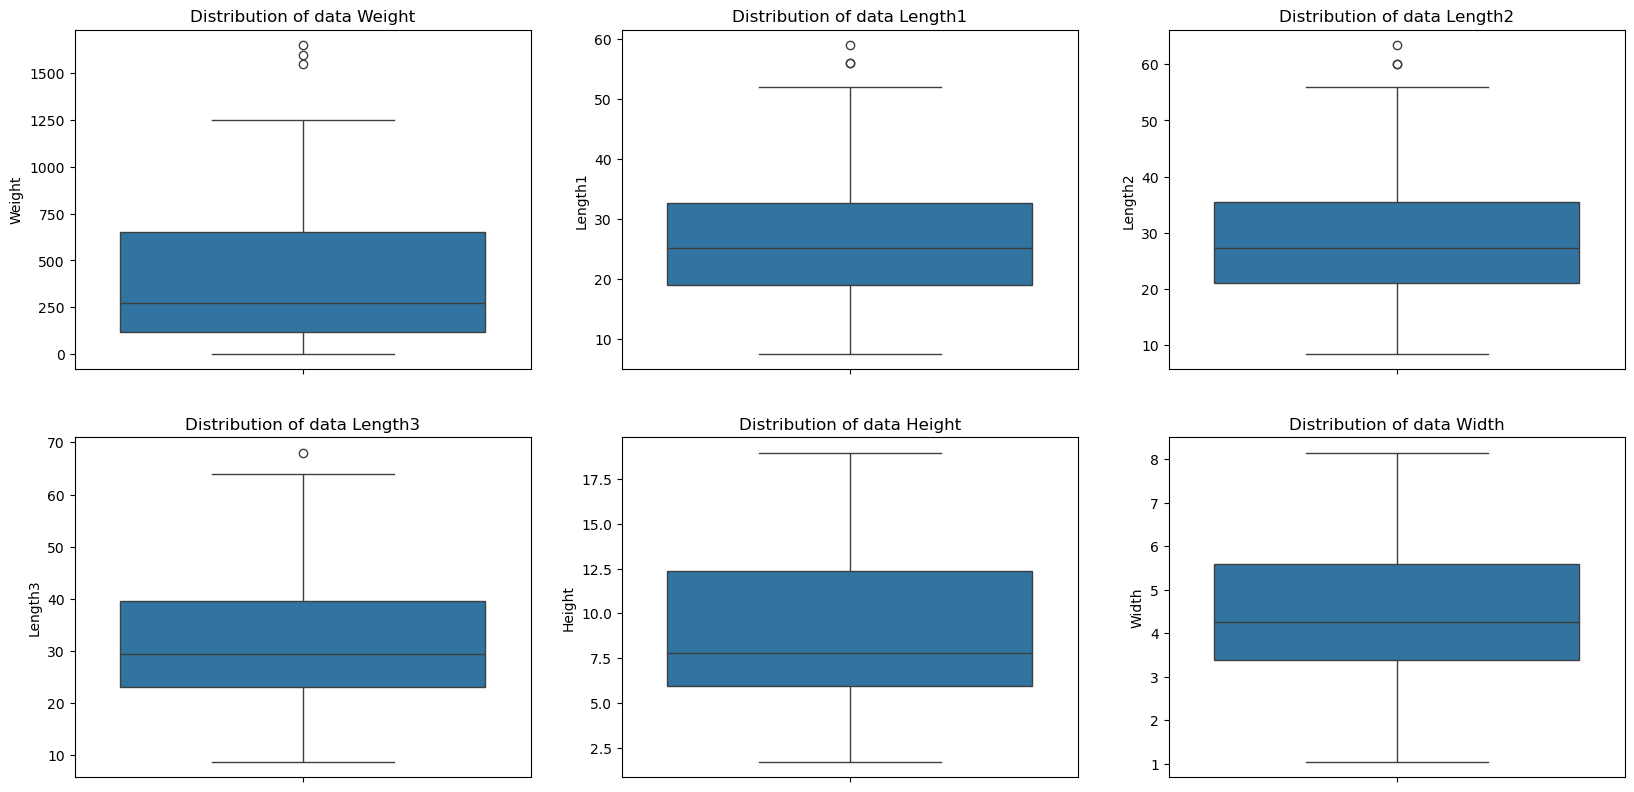

In [10]:
for i, col in enumerate(numerical_data):
    plt.subplot(3, 3, i+1)
    sns.boxplot(df[col])
    plt.title(f"Distribution of data {col}")
    

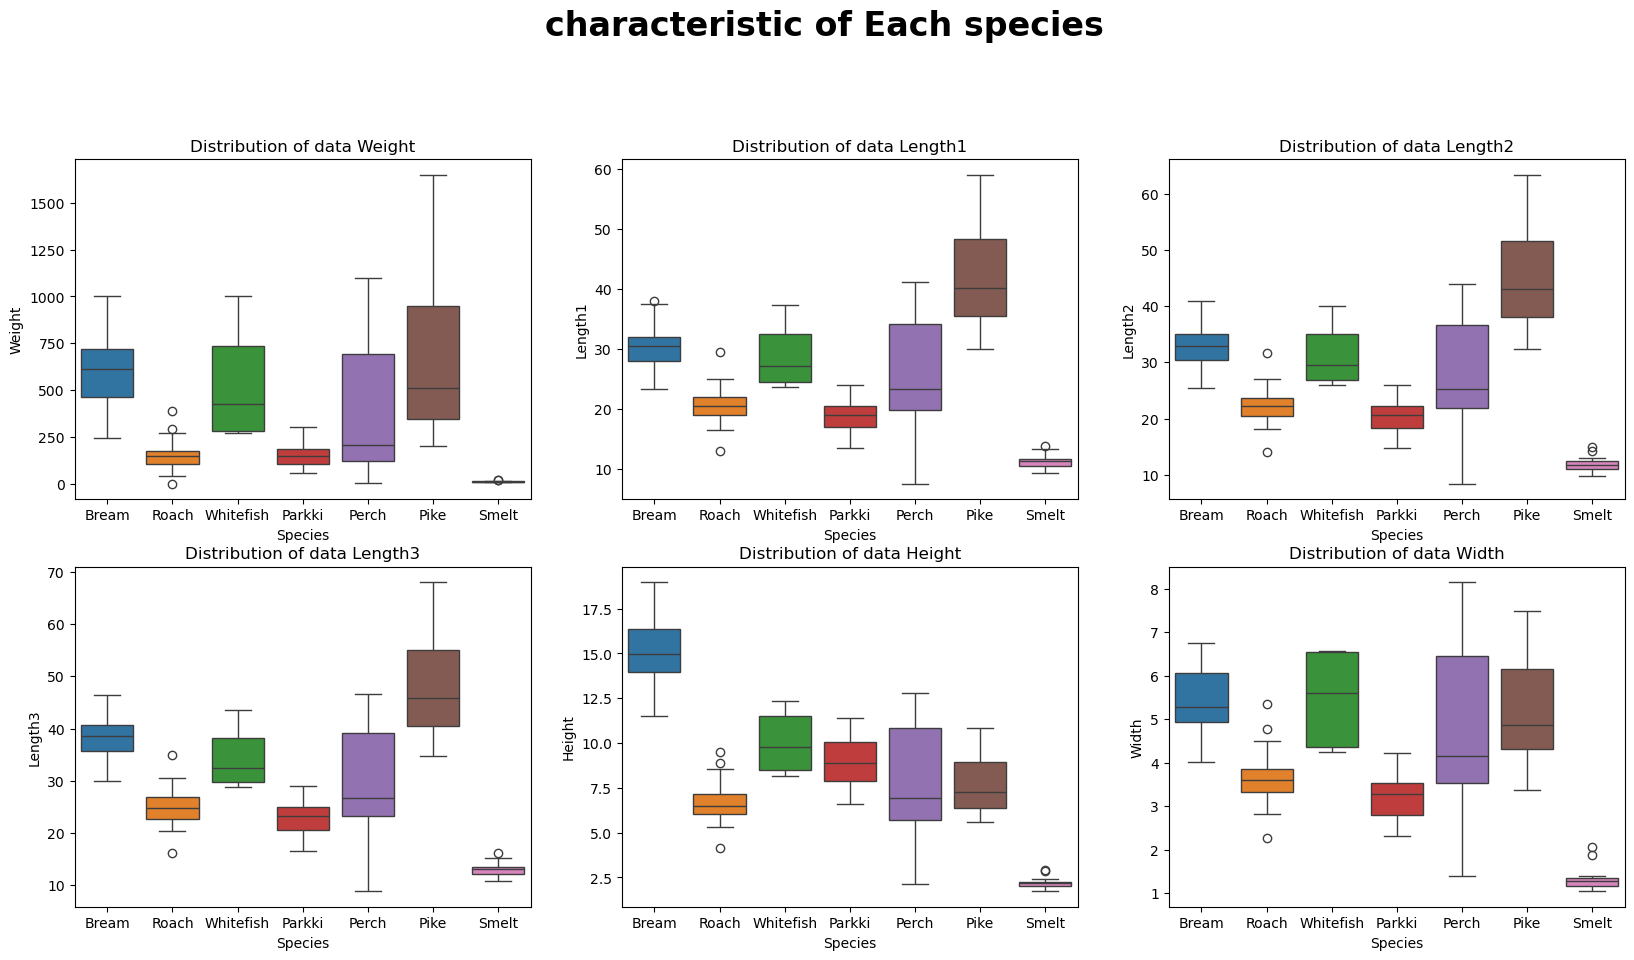

In [11]:
for i, col in enumerate(numerical_data):
    plt.subplot(3, 3, i+1)
    plt.title(f"Distribution of data {col}")
    sns.boxplot(data=df, x='Species', y=col, hue='Species')
plt.suptitle(f'characteristic of Each species', size=24, weight='bold')
plt.show()
    

**Hightlight of characteristic📈**
- Species `Smelt` have smallest size from each feature indicate: `Smelt` species with small size

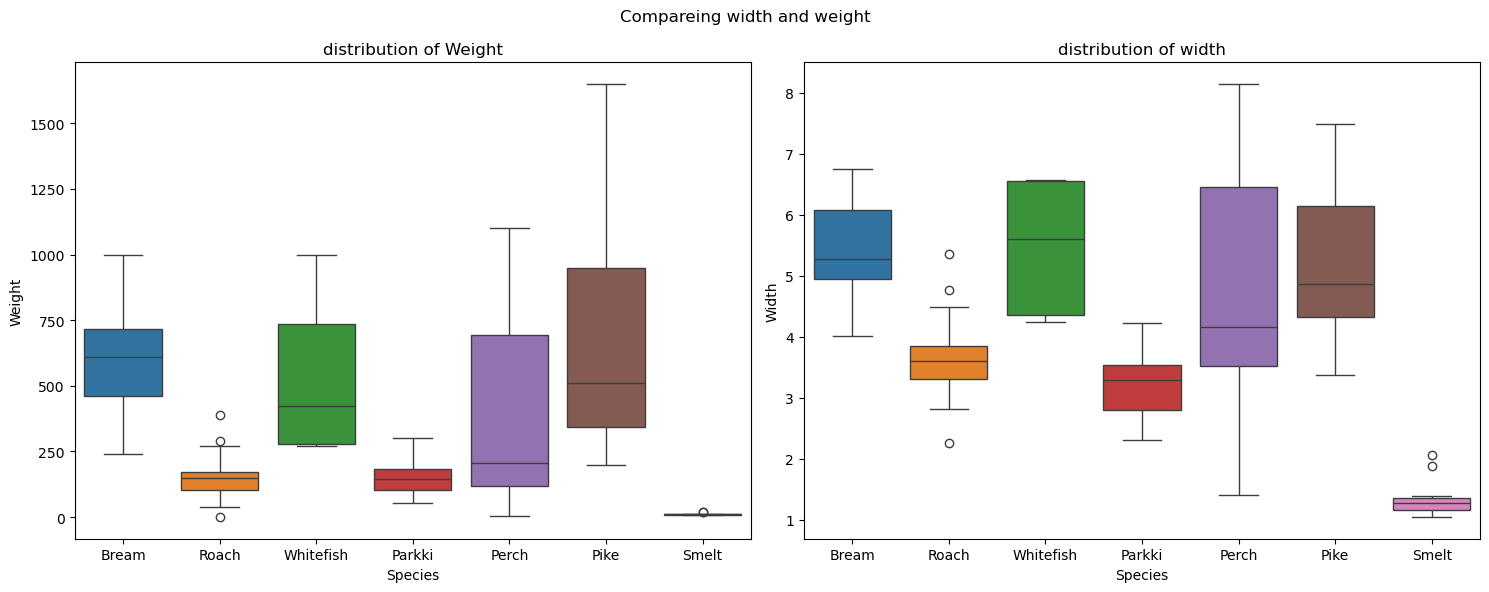

In [12]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.title('distribution of Weight')
sns.boxplot(data=df, x='Species', y='Weight', hue='Species')

plt.subplot(1, 2, 2)
plt.title('distribution of width')
sns.boxplot(data=df, x='Species', y='Width', hue='Species')

plt.suptitle('Compareing width and weight')
plt.tight_layout()
plt.show()

**Charateritic Weight and Width📈**
Width and weight it should be correlate because thickness of fish will effect the weight of the 

- a `width` of fish have a trend and correlated with `weight`
- but the species of `Pike` have high weight but small width


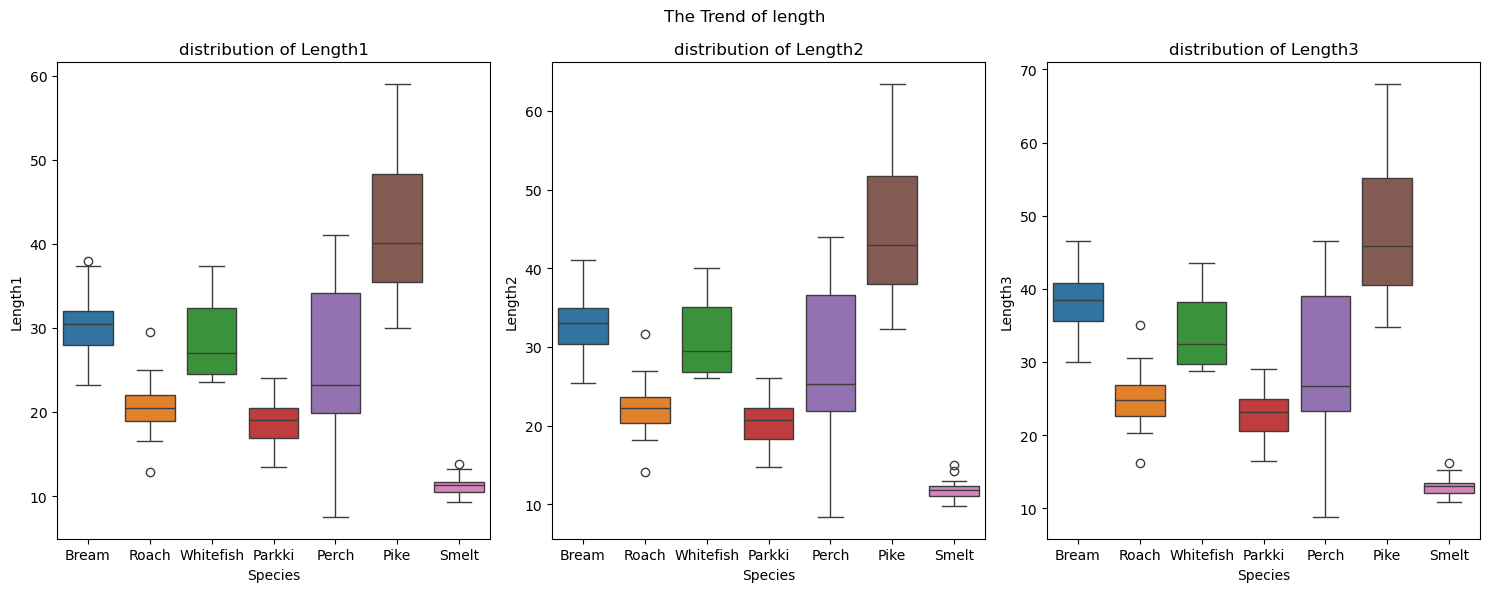

In [13]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
plt.title('distribution of Length1')
sns.boxplot(data=df, x='Species', y='Length1', hue='Species')

plt.subplot(1, 3, 2)
plt.title('distribution of Length2')
sns.boxplot(data=df, x='Species', y='Length2', hue='Species')

plt.subplot(1, 3, 3)
plt.title('distribution of Length3')
sns.boxplot(data=df, x='Species', y='Length3', hue='Species')

plt.suptitle('The Trend of length')
plt.tight_layout()
plt.show()

**Charateritic Weight and Length📈**
- each of mearsurment of lenth have a very strong correlation and almot identical
- but the trend is upward, the more bigger length1 it will impact to length2 and length3
- we can make a ratio and make it to 1 column to have a full insight of length in 1 column at the same time

<Axes: title={'center': 'Distribution of Height'}, xlabel='Species', ylabel='Height'>

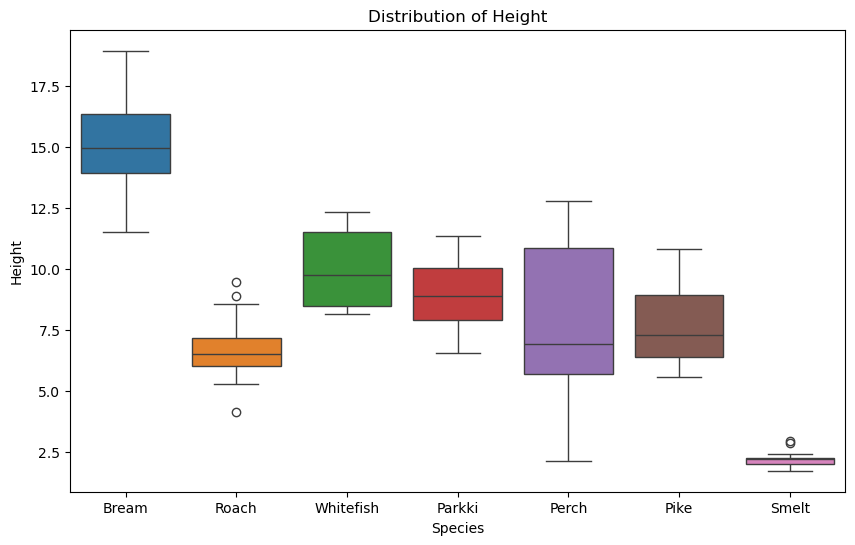

In [14]:
plt.figure(figsize=(10, 6))
plt.title('Distribution of Height')
sns.boxplot(data=df, x='Species', y='Height', hue='Species')

- species `Bream` have the tallest `height` this type of fish have a wide fin

In [15]:
df['length_ratio'] = df[['Length1', 'Length2', 'Length3']].mean()
df['size_ratio'] = df['length_ratio'] / df['Height']
df['wide_ratio'] = df['Width'] / df['Weight']

UnboundLocalError: local variable 'boxprops' referenced before assignment

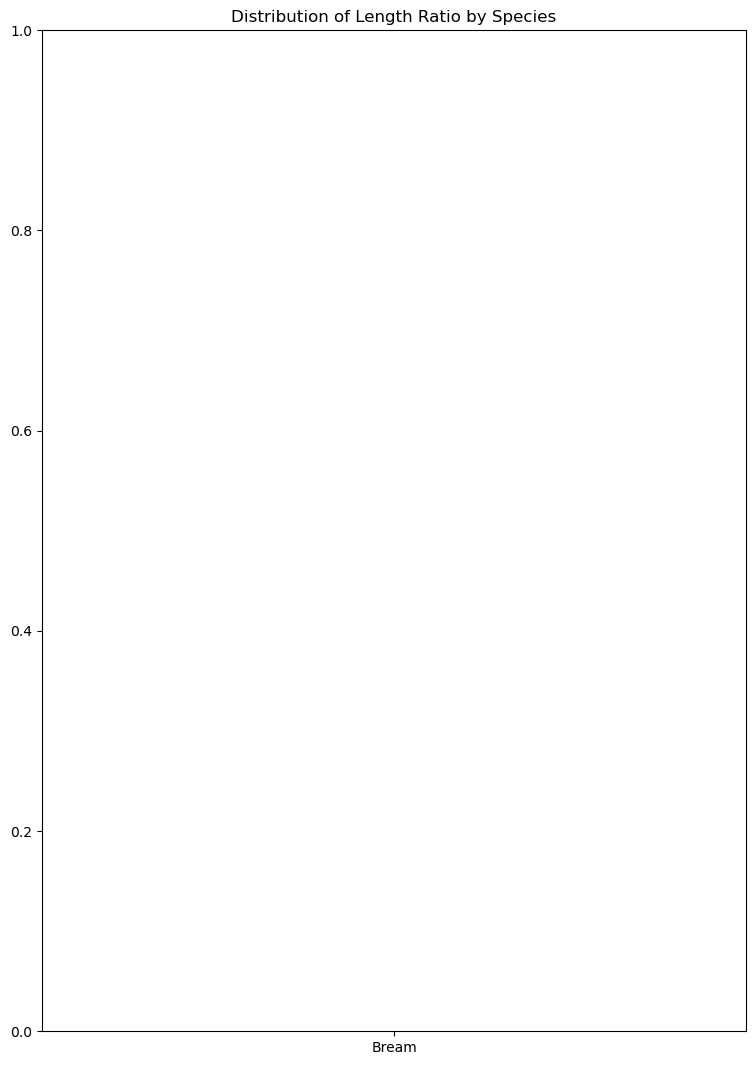

In [16]:
plt.figure(figsize=(20, 13))

plt.subplot(1, 2, 1)
plt.title('Distribution of Length Ratio by Species')
sns.boxplot(data=df, x='Species', y='length_ratio', hue='Species')

plt.subplot(1, 2, 2)
plt.title('Distribution of Size Ratio by Species')
sns.boxplot(data=df, x='Species', y='size_ratio', hue='Species')

plt.subplot(1, 2, 3)
plt.title('Distribution of Wide Ratio by Species')
sns.boxplot(data=df, x='Species', y='wide_ratio', hue='Species')

plt.suptitle('Ratios by Species')
plt.tight_layout()
plt.show()

UnboundLocalError: local variable 'boxprops' referenced before assignment

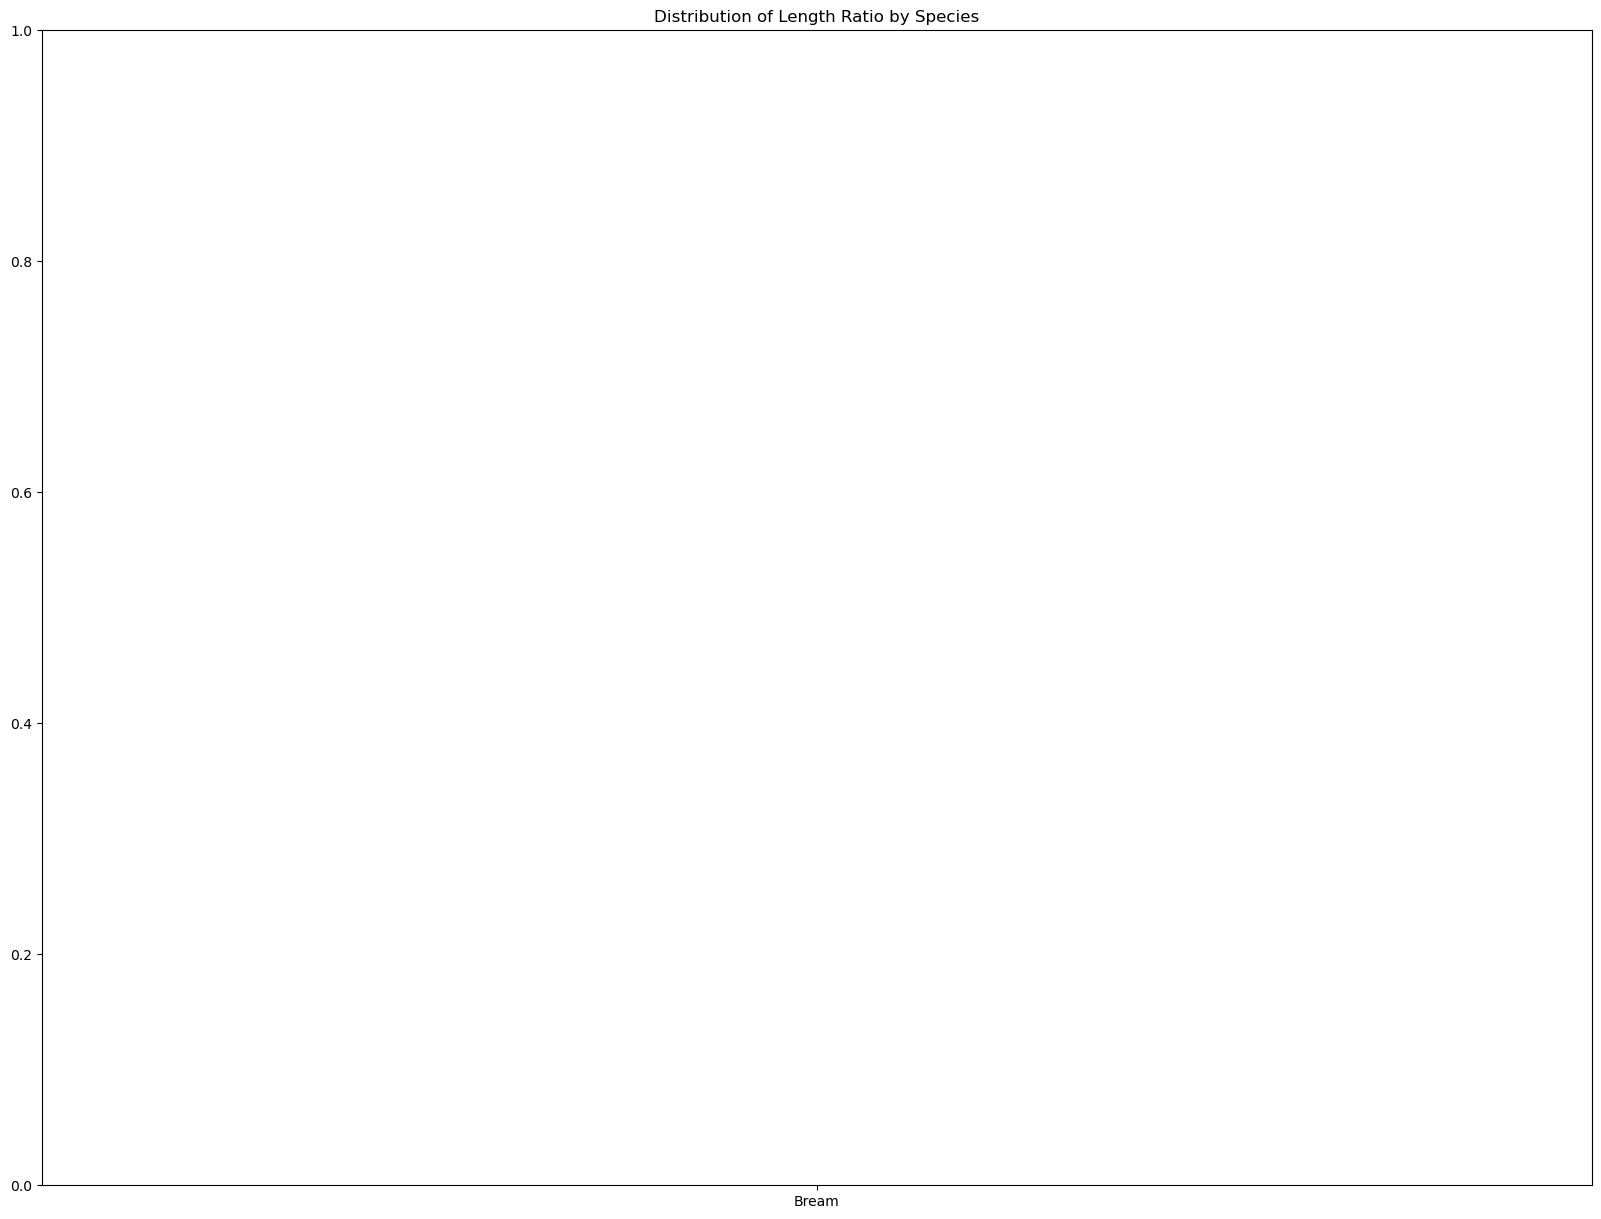

UnboundLocalError: local variable 'boxprops' referenced before assignment

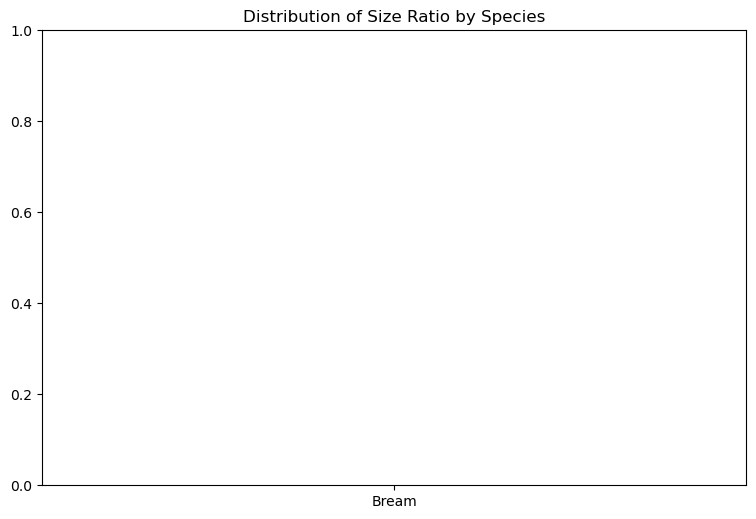

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import pandas as pd 
import numpy as np
import tkinter as tk 
import seaborn as sns
import os
from tkinter import messagebox, ttk

class FishTypePredictionApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Fish Species Prediction App")
        self.root.attributes('-fullscreen', True)
        # self.history = load_history_from_pickle()
        
        self.tab_control = ttk.Notebook(root)
        self.predict_tab = ttk.Frame(self.tab_control, padding="50")
        self.history_tab = ttk.Frame(self.tab_control, padding="50")
        self.setting_tab = ttk.Frame(self.tab_control, padding="50")
        
        style = ttk.Style()
        style.configure('TNotebook.Tab', padding=[40, 15], font=('Poppins', 15))
        
        self.tab_control.add(self.predict_tab, text="Predict")
        self.tab_control.add(self.history_tab, text="History")
        self.tab_control.add(self.setting_tab, text="Setting")
        self.tab_control.pack(fill='x', anchor='w')
        
        self.init_predict_tab()
        self.init_history_tab()
        self.init_setting_tab()
        self.scenario_frame = ttk.Frame(self.setting_tab)
        self.scenario_frame.grid(column=0, row=5, sticky='w')
        self.update_setting()  # Ensure input fields are created
        
    def create_input_field(self, parent, label_text, description_text, column, row, default_value=""):
        ttk.Label(parent, text=label_text, font=('Poppins medium', 15)).grid(column=column, row=row, sticky='w', padx=(0, 30))
        entry = ttk.Entry(parent, font=('Poppins', 16))
        entry.insert(0, default_value)
        entry.grid(column=column, row=row+1, sticky='w', padx=(0, 30))
        ttk.Label(parent, text=description_text, font=('Poppins light', 10)).grid(column=column, row=row+2, sticky='w', padx=(0, 30))
        setattr(self, f"{label_text.lower().replace(' ', '_')}_entry", entry)

    def get_input_value(self, label_text):
        entry = getattr(self, f"{label_text.lower().replace(' ', '_')}_entry")
        return entry.get()
    
    # Example usage of create_input_field and get_input_value functions
        
    def init_predict_tab(self):
        ttk.Label(self.predict_tab, text="Fish Species Prediction App", font=('Poppins medium', 30)).grid(column=0, row=0, sticky='w', columnspan=2)
        ttk.Label(self.predict_tab, text="Get precise species with KNN (K-Nearest Neighbor Algorithm)", font=('Poppins', 15)).grid(column=0, row=1, sticky='w', columnspan=2)
        
        self.frame_input = ttk.Frame(self.predict_tab)
        self.frame_input.grid(column=0, row=2, sticky='w', columnspan=2)

        ttk.Button(self.predict_tab, text="Go Predict", command=self.predict_and_plot, padding="10").grid(column=0, row=2, sticky='w', pady=(150,0))
        
        self.predict_result = ttk.Frame(self.predict_tab)
        self.predict_result.grid(column=1, row=3, sticky='w',pady=(30,0))
            
        self.figure = plt.Figure(figsize=(7, 5), dpi=100)
        self.ax = self.figure.add_subplot(111)
        self.canvas = FigureCanvasTkAgg(self.figure, self.predict_tab)
        self.canvas.get_tk_widget().grid(column=0, row=3, sticky='w', pady=(30,0))
        
    def predict_and_plot(self):
        length1_value = float(self.get_input_value("Length 1")) if hasattr(self, 'length_1_entry') else 0
        length2_value = float(self.get_input_value("Length 2")) if hasattr(self, 'length_2_entry') else 0
        length3_value = float(self.get_input_value("Length 3")) if hasattr(self, 'length_3_entry') else 0
        height_value = float(self.get_input_value("Height")) if hasattr(self, 'height_entry') else 0
        width_value = float(self.get_input_value("Width")) if hasattr(self, 'width_entry') else 0
        weight_value = float(self.get_input_value("Weight")) if hasattr(self, 'weight_entry') else 0
        
        length_ratio = np.mean([length1_value, length2_value, length3_value])
        size_ratio = length_ratio / height_value if height_value != 0 else 0
        wide_ratio = weight_value / width_value if width_value != 0 else 0
        
        plt.figure(figsize=(10, 5))
        
        selected_scenario = self.scenario_select_var.get()
        
        if selected_scenario == 'Best':
            sns.scatterplot(data=df, x='size_ratio', y='wide_ratio', hue='Species')
            sns.scatterplot(x=np.array([size_ratio]), y=np.array([wide_ratio]), c='black', marker='x', s=250, legend=True)
            plt.xlabel('Size Ratio')
            plt.ylabel('Wide Ratio')
        elif selected_scenario == 'Medium':
            sns.scatterplot(data=df, x='Height', y='size_ratio', hue='Species')
            sns.scatterplot(x=np.array([height_value]), y=np.array([size_ratio]), c='black', marker='x', s=250, legend=True)
            plt.xlabel('Height')
            plt.ylabel('Size Ratio')
        elif selected_scenario == 'Low':
            sns.scatterplot(data=df, x='Height', y='size_ratio', hue='Species')
            sns.scatterplot(x=np.array([height_value]), y=np.array([size_ratio]), c='black', marker='x', s=250, legend=True)
            plt.xlabel('Height')
            plt.ylabel('Size Ratio')
        
        plt.title('New Instance Input (X)', size=22, weight='bold')
        plt.show()
        
        new_row = pd.DataFrame({
            'predict': ['Lele'],
            'predict_detail': ['Lele'],
            'timestamp': [pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')],
            'confident_score': ['Lele'],
            'scenario': [self.scenario_select.get()],
            'length1': [length1_value],
            'length2': [length2_value],
            'length3': [length3_value],
            'height': [height_value],
            'width': [width_value],
            'weight': [weight_value],
            'length_ratio': [length_ratio],
            'wide_ratio': [wide_ratio],
            'size_ratio': [size_ratio],
            'k_value': ['Lele'],
            'distance': ['Lele'],
            'scaling_status': [True],
        })
        
        ttk.Label(self.predict_result, text="Prediction Result", font=('Poppins medium', 23)).grid(column=0, row=0, sticky='w', )
        
        ttk.Label(self.predict_result, text="Species Prediction", font=('Poppins light', 10)).grid(column=0, row=1, sticky='w')
        ttk.Label(self.predict_result, text=new_row['predict'][0], font=('Poppins', 17)).grid(column=0, row=2, sticky='w')
        ttk.Label(self.predict_result, text="Timestamp", font=('Poppins light', 10)).grid(column=0, row=1, padx=(200, 0), sticky='w')
        ttk.Label(self.predict_result, text=new_row['timestamp'][0], font=('Poppins', 17)).grid(column=0, row=2, padx=(200, 0), sticky='w')
        
        ttk.Label(self.predict_result, text="Confident Score", font=('Poppins light', 10)).grid(column=0, row=3, sticky='w')
        ttk.Label(self.predict_result, text=new_row['confident_score'][0], font=('Poppins', 17)).grid(column=0, row=4, sticky='w')
        ttk.Label(self.predict_result, text="Detail Prediction", font=('Poppins light', 10)).grid(column=0, row=3, padx=(200, 0), sticky='w')
        ttk.Label(self.predict_result, text=new_row['predict_detail'][0], font=('Poppins', 17)).grid(column=0, row=4, padx=(200, 0), sticky='w')
        
        ttk.Label(self.predict_result, text="Length 1", font=('Poppins light', 10)).grid(column=0, row=5, sticky='w')
        ttk.Label(self.predict_result, text=new_row['length1'][0], font=('Poppins', 17)).grid(column=0, row=6, sticky='w')
        ttk.Label(self.predict_result, text="Length 2", font=('Poppins light', 10)).grid(column=0, row=5, padx=(200, 0), sticky='w')
        ttk.Label(self.predict_result, text=new_row['length2'][0], font=('Poppins', 17)).grid(column=0, row=6, padx=(200, 0), sticky='w')
        
        ttk.Label(self.predict_result, text="Length 3", font=('Poppins light', 10)).grid(column=0, row=7, sticky='w')
        ttk.Label(self.predict_result, text=new_row['length3'][0], font=('Poppins', 17)).grid(column=0, row=8, sticky='w')
        ttk.Label(self.predict_result, text="Height", font=('Poppins light', 10)).grid(column=0, row=7, padx=(200, 0), sticky='w')
        ttk.Label(self.predict_result, text=new_row['height'][0], font=('Poppins', 17)).grid(column=0, row=8, padx=(200, 0), sticky='w')
        
        ttk.Label(self.predict_result, text="Length Ratio", font=('Poppins light', 10)).grid(column=0, row=9, sticky='w')
        ttk.Label(self.predict_result, text=new_row['length_ratio'][0], font=('Poppins', 17)).grid(column=0, row=10, sticky='w')
        ttk.Label(self.predict_result, text="K Value", font=('Poppins light', 10)).grid(column=0, row=9, padx=(200, 0), sticky='w')
        ttk.Label(self.predict_result, text=new_row['k_value'][0], font=('Poppins', 17)).grid(column=0, row=10, padx=(200, 0), sticky='w')
        
        ttk.Label(self.predict_result, text="Distance", font=('Poppins light', 10)).grid(column=0, row=11, sticky='w')
        ttk.Label(self.predict_result, text=new_row['distance'][0], font=('Poppins', 17)).grid(column=0, row=12, sticky='w')
        ttk.Label(self.predict_result, text="Scaling", font=('Poppins light', 10)).grid(column=0, row=11, padx=(200, 0), sticky='w')
        ttk.Label(self.predict_result, text=new_row['scaling_status'][0], font=('Poppins', 17)).grid(column=0, row=12, padx=(200, 0), sticky='w')
        
    def init_history_tab(self):
        ttk.Label(self.history_tab, text="Prediction History", font=('Poppins medium', 30)).grid(column=0, row=0,  sticky='w')
        ttk.Label(self.history_tab, text="View past predictions", font=('Poppins', 15)).grid(column=0, row=1, sticky='w')
        
        self.history_tree = ttk.Treeview(self.history_tab, columns=('Timestamp', 'Species Prediction', 'Height', 'Length Ratio'))
        self.history_tree.heading('Timestamp', text='Timestamp')
        self.history_tree.heading('Species Prediction', text='Species Prediction')
        self.history_tree.heading('Height', text='Height')
        self.history_tree.heading('Length Ratio', text='Length Ratio')
        self.history_tree.grid(column=0, row=3)
        
        ttk.Button(self.history_tab, text="Compare History", command=self.compare_history, padding="10").grid(column=0, row=5, sticky='e', pady=10)
        
        # COMPARE ============================================================================================================
        frame_compare1 = ttk.Frame(self.history_tab)
        frame_compare1.grid(column=0, row=6)        
        
        # COMPARE ============================================================================================================
        frame_compare2 = ttk.Frame(self.history_tab)
        frame_compare2.grid(column=1, row=6)
 
    def compare_history(self):
        self.selected_item = self.history_tree.selection()
        
        if len(self.selected_item) != 2:
            messagebox.showerror("Error", "please select exact 2 for comparation")
            
        item1 = self.history_tree.item(self.selected_item[0], 'value')
        item2 = self.history_tree.item(self.selected_item[0], 'value')
        
        ttk.Label(self.frame_compare1, text="Compare 1", font=('Poppins medium', 23)).grid(column=0, row=0, sticky='w' )
        
        ttk.Label(self.frame_compare1, text="Species Prediction", font=('Poppins light', 10)).grid(column=0, row=1, sticky='w')
        ttk.Label(self.frame_compare1, text=item1['predict'][0], font=('Poppins', 17)).grid(column=0, row=2, sticky='w')
        ttk.Label(self.frame_compare1, text="Timestamp", font=('Poppins light', 10)).grid(column=0, row=1, padx=(200, 0), sticky='w')
        ttk.Label(self.frame_compare1, text=item1['timestamp'][0], font=('Poppins', 17)).grid(column=0, row=2, padx=(200, 0), sticky='w')
        
        ttk.Label(self.frame_compare1, text="Confident Score", font=('Poppins light', 10)).grid(column=0, row=3, sticky='w')
        ttk.Label(self.frame_compare1, text=item1['confident_score'][0], font=('Poppins', 17)).grid(column=0, row=4, sticky='w')
        ttk.Label(self.frame_compare1, text="Detail Prediction", font=('Poppins light', 10)).grid(column=0, row=3, padx=(200, 0), sticky='w')
        ttk.Label(self.frame_compare1, text=item1['predict_detail'][0], font=('Poppins', 17)).grid(column=0, row=4, padx=(200, 0), sticky='w')
        
        ttk.Label(self.frame_compare1, text="Length 1", font=('Poppins light', 10)).grid(column=0, row=5, sticky='w')
        ttk.Label(self.frame_compare1, text=item1['length1'][0], font=('Poppins', 17)).grid(column=0, row=6, sticky='w')
        ttk.Label(self.frame_compare1, text="Length 2", font=('Poppins light', 10)).grid(column=0, row=5, padx=(200, 0), sticky='w')
        ttk.Label(self.frame_compare1, text=item1['length2'][0], font=('Poppins', 17)).grid(column=0, row=6, padx=(200, 0), sticky='w')
        
        ttk.Label(self.frame_compare1, text="Length 3", font=('Poppins light', 10)).grid(column=0, row=7, sticky='w')
        ttk.Label(self.frame_compare1, text=item1['length3'][0], font=('Poppins', 17)).grid(column=0, row=8, sticky='w')
        ttk.Label(self.frame_compare1, text="Height", font=('Poppins light', 10)).grid(column=0, row=7, padx=(200, 0), sticky='w')
        ttk.Label(self.frame_compare1, text=item1['height'][0], font=('Poppins', 17)).grid(column=0, row=8, padx=(200, 0), sticky='w')
        
        ttk.Label(self.frame_compare1, text="Length Ratio", font=('Poppins light', 10)).grid(column=0, row=9, sticky='w')
        ttk.Label(self.frame_compare1, text=item1['length_ratio'][0], font=('Poppins', 17)).grid(column=0, row=10, sticky='w')
        ttk.Label(self.frame_compare1, text="K Value", font=('Poppins light', 10)).grid(column=0, row=9, padx=(200, 0), sticky='w')
        ttk.Label(self.frame_compare1, text=item1['k_value'][0], font=('Poppins', 17)).grid(column=0, row=10, padx=(200, 0), sticky='w')
        
        ttk.Label(self.frame_compare1, text="Distance", font=('Poppins light', 10)).grid(column=0, row=11, sticky='w')
        ttk.Label(self.frame_compare1, text=item1['distance'][0], font=('Poppins', 17)).grid(column=0, row=12, sticky='w')
        ttk.Label(self.frame_compare1, text="Scaling", font=('Poppins light', 10)).grid(column=0, row=11, padx=(200, 0), sticky='w')
        ttk.Label(self.frame_compare1, text=item1['scaling_status'][0], font=('Poppins', 17)).grid(column=0, row=12, padx=(200, 0), sticky='w')
        
        # Compare 2 ============================================================================================================
        ttk.Label(self.frame_compare2, text="Compare 2", font=('Poppins medium', 23)).grid(column=0, row=0, sticky='w', )
        
        ttk.Label(self.frame_compare2, text="Species Prediction", font=('Poppins light', 10)).grid(column=0, row=1, sticky='w')
        ttk.Label(self.frame_compare2, text=item2['predict'][0], font=('Poppins', 17)).grid(column=0, row=2, sticky='w')
        ttk.Label(self.frame_compare2, text="Timestamp", font=('Poppins light', 10)).grid(column=0, row=1, padx=(200, 0), sticky='w')
        ttk.Label(self.frame_compare2, text=item2['timestamp'][0], font=('Poppins', 17)).grid(column=0, row=2, padx=(200, 0), sticky='w')
        
        ttk.Label(self.frame_compare2, text="Confident Score", font=('Poppins light', 10)).grid(column=0, row=3, sticky='w')
        ttk.Label(self.frame_compare2, text=item2['confident_score'][0], font=('Poppins', 17)).grid(column=0, row=4, sticky='w')
        ttk.Label(self.frame_compare2, text="Detail Prediction", font=('Poppins light', 10)).grid(column=0, row=3, padx=(200, 0), sticky='w')
        ttk.Label(self.frame_compare2, text=item2['predict_detail'][0], font=('Poppins', 17)).grid(column=0, row=4, padx=(200, 0), sticky='w')
        
        ttk.Label(self.frame_compare2, text="Length 1", font=('Poppins light', 10)).grid(column=0, row=5, sticky='w')
        ttk.Label(self.frame_compare2, text=item2['length1'][0], font=('Poppins', 17)).grid(column=0, row=6, sticky='w')
        ttk.Label(self.frame_compare2, text="Length 2", font=('Poppins light', 10)).grid(column=0, row=5, padx=(200, 0), sticky='w')
        ttk.Label(self.frame_compare2, text=item2['length2'][0], font=('Poppins', 17)).grid(column=0, row=6, padx=(200, 0), sticky='w')
        
        ttk.Label(self.frame_compare2, text="Length 3", font=('Poppins light', 10)).grid(column=0, row=7, sticky='w')
        ttk.Label(self.frame_compare2, text=item2['length3'][0], font=('Poppins', 17)).grid(column=0, row=8, sticky='w')
        ttk.Label(self.frame_compare2, text="Height", font=('Poppins light', 10)).grid(column=0, row=7, padx=(200, 0), sticky='w')
        ttk.Label(self.frame_compare2, text=item2['height'][0], font=('Poppins', 17)).grid(column=0, row=8, padx=(200, 0), sticky='w')
        
        ttk.Label(self.frame_compare2, text="Length Ratio", font=('Poppins light', 10)).grid(column=0, row=9, sticky='w')
        ttk.Label(self.frame_compare2, text=item2['length_ratio'][0], font=('Poppins', 17)).grid(column=0, row=10, sticky='w')
        ttk.Label(self.frame_compare2, text="K Value", font=('Poppins light', 10)).grid(column=0, row=9, padx=(200, 0), sticky='w')
        ttk.Label(self.frame_compare2, text=item2['k_value'][0], font=('Poppins', 17)).grid(column=0, row=10, padx=(200, 0), sticky='w')
        
        ttk.Label(self.frame_compare2, text="Distance", font=('Poppins light', 10)).grid(column=0, row=11, sticky='w')
        ttk.Label(self.frame_compare2, text=item2['distance'][0], font=('Poppins', 17)).grid(column=0, row=12, sticky='w')
        ttk.Label(self.frame_compare2, text="Scaling", font=('Poppins light', 10)).grid(column=0, row=11, padx=(200, 0), sticky='w')
        ttk.Label(self.frame_compare2, text=item2['scaling_status'][0], font=('Poppins', 17)).grid(column=0, row=12, padx=(200, 0), sticky='w')
        
        
    def init_setting_tab(self):
        ttk.Label(self.setting_tab, text="Settings", font=('Poppins medium', 30)).grid(column=0, row=0,  sticky='w')
        ttk.Label(self.setting_tab, text="Adjust application settings", font=('Poppins', 15)).grid(column=0, row=1, sticky='w')
        
        # 1. size_ratio & wide_ratio
        # 2. Height & size_ratio
        # 3. Height, size_ratio, wide_ratio
        ttk.Label(self.setting_tab,text="Chosee Scenario", font=('Poppins', 15)).grid(column=0, row=2, sticky='w')
        self.scenario_select_var = tk.StringVar(value='Best')
        self.scenario_select = ttk.Combobox(self.setting_tab, values=['Best', 'Medium', 'Low' ], textvariable=self.scenario_select_var, font=('Poppins', 16))
        self.scenario_select.grid(column=0, row=3, sticky='w')
        ttk.Label( self.setting_tab, text="Chosee your input, which best, medium, or low",font=('Poppins', 12)).grid(column=0, row=4, sticky='w')
        self.scenario_select.bind("<<ComboboxSelected>>", self.update_setting)
        
        

    def update_setting(self, event=None):
        for widget in self.scenario_frame.winfo_children():
            widget.grid_forget()
        
        for widget in self.frame_input.winfo_children():
            widget.grid_forget()
            
        input_labels = {
            'Best': ('Length 1', 'Length 2', 'Length 3', 'Height'),
            'Medium': ('Height', 'Width', 'Weight'),
            'Low': ('Length 1', 'Length 2', 'Length 3', 'Height', 'Width', 'Weight'),
        }
        
        selected_scenario = self.scenario_select_var.get()
        labels = input_labels[selected_scenario]
        
        for i, label in enumerate(labels):
            self.create_input_field(self.frame_input, label, f"{label} in cm", i, 0)
        
        
        
if __name__ == "__main__":
    root = tk.Tk()
    app = FishTypePredictionApp(root)
    root.mainloop()

: 